## 1. Introduction
A PhD (Doctor or Doctorate of Philosophy) is the highest academic degree a person can achieve. It is often seen as a hallmark of a succesfull career and great achievements. In recent years, however, more and more criticizm has been raised against current PhD education. The Economist for examples titles ["Why doing a PhD is often a waste of time"](https://medium.economist.com/why-doing-a-phd-is-often-a-waste-of-time-349206f9addb). In a recent article, [The Guardian](https://www.theguardian.com/commentisfree/2018/aug/15/should-do-phd-you-asked-autocomplete-questions) writes that "PhDs are often glamourised in popular culture" and that the real life of PhD students is far from the idea people have about grad school.

With its Graduate Survey, Nature wants to explore the goals and challenges of young researchers pursuing a PhD in the natural sciences. In the [2017 edition](https://www.nature.com/nature/journal/v550/n7677/full/nj7677-549a.html), more than 5700 PhD students from all over the world participated in the online survey. The results showed that, although 75% of the participants are at least somewhat satisfied with their PhD program, 25% are concerned about mental health and at least 45% of those have sought help because of anxiety. Further, PhD students worry about maintaining their work-life balance and about their future career path (both 55%). Half of the participants were also worry about finances, funding, and the low number of available research jobs.

While [the fifth edition](https://www.nature.com/articles/d41586-019-01763-w) of the biannaual survey series is currently on its way, it is time to have a closer look at the [2017 data](https://figshare.com/articles/Nature_Graduate_Survey_2017/5480716) from a data-driven perspective and try to find answers to the following questions:

**1. Why do students pursue a PhD?**

**2. What skills do students take up during their PhD?**

**3. Are there difference in satisfaction between differnt groups (e.g. fields or motivation)?** and

**4. Can the satisfaction of PhD students with grad school be predicted based on prior features such as field and motivation?**

## 2. Data Exploration and Wrangling
### 2.1 Data Exploration
The full dataset is available for download [here](https://figshare.com/articles/Nature_Graduate_Survey_2017/5480716). The data comes in an Excel spreadsheet that was exported to csv and then read with pandas. The dataset has already been pre-cleaned by Nature, however, feature selection and encoding are still necessary for exploration.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data into dataframe
df = pd.read_csv('transformed.csv', delimiter=';', skiprows=0, low_memory=False)

# first row contains the question text
# store questions separately and drop them from original dataframe
df_question = df.iloc[0, :]
df.drop(index=0, axis=0, inplace=True)

In [3]:
# explore dataset
df.head()

,ID.format,ID.completed,ID.language,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,Q1.a,...,Q59,Q59.a,Q60,Q60.a,Q61,Q61.a,Q62,Q63,Q68,Q69
1,SNAP 2015 SHIFT,completed,English,06/15/2017,11:06:36,06/15/2017,11:11:45,"5,15",Doctorate degree (PhD/DPhil/MD),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25 - 34,NaN,Banner on Springerlink.com article pages,2017
2,SNAP 2015 SHIFT,completed,English,06.09.17,19:03:30,06.09.17,19:09:01,"5,52",Doctorate degree (PhD/DPhil/MD),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25 - 34,NaN,Pop up on Springerlink.com journalbook pages,2017
3,SNAP 2015 SHIFT,completed,English,06/14/2017,16:17:20,06/14/2017,16:23:08,"5,8",Doctorate degree (PhD/DPhil/MD),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25 - 34,NaN,Banner on Springerlink.com article pages,2017
4,SNAP 2015 SHIFT,completed,English,06.08.17,21:27:54,06.08.17,21:33:47,"5,88",Doctorate degree (PhD/DPhil/MD),NaN,...,Cell/molecular biology,NaN,NaN,NaN,NaN,NaN,25 - 34,NaN,Pop up on Nature.com,2017
5,SNAP 2015 SHIFT,completed,English,06.12.17,05:59:45,06.12.17,06:05:50,"6,08",Doctorate degree (PhD/DPhil/MD),NaN,...,Biomedicine,NaN,NaN,NaN,NaN,NaN,25 - 34,no,Pop up on Nature.com,2017


In [4]:
# get shape of dataset
df.shape

(5723, 268)

In [5]:
# get data types
df.dtypes

ID.format        object
ID.completed     object
ID.language      object
ID.date          object
ID.start         object
ID.endDate       object
ID.end           object
ID.time          object
Q1               object
Q1.a             object
Q2              float64
Q3:1             object
Q3:2             object
Q3:3             object
Q3:4             object
Q3:5             object
Q3:6             object
Q3.a             object
Q4               object
Q4.a             object
Q5               object
Q6               object
Q7               object
Q7.a             object
Q8               object
Q9               object
Q10:1            object
Q10:2            object
Q10:3            object
Q10:4            object
                 ...   
Q55.a            object
Q55.b            object
Q56:1            object
Q56:2            object
Q56:3            object
Q56:4            object
Q56:5            object
Q56:6            object
Q56:7            object
Q56:8            object
Q56.a           

#### Observations and decisions on features
* the first row of the original dataset contain the questions; they were stored separatey
* the column headings in the dataframe only contain the question number and need to be renamed
    * detailed explanations of the questions are provided in a document that can be downloaded next to the dataset
* the dataset contains 5273 entries (rows) and 268 features (columns)
* most of the features containt textual answers and are thus of type object
* most of the features are categorical or ordinal and need to be encoded to build a model to predict satisfation
* some answers to the same questions are spread over multiple columns (e.g. Q3)
    * this makes one-hot encoding simple, however, for data analysis the columns will combined into a single column
    * in case of multiple given ansers, the value from the corresponding 'most relevant' questions is used
* not all features seem suitable to answers the raised questions; below, features for this study are selected

##### Useful features to keep
* Q62: age
* Q58: field of study
* Q5: year of PhD programme
* Q6: average duration of PhD program at institution
* Q21-26: country
* Q19: studying abroad
* Q7: highest level of education prior to PhD
* Q3/Q4: motivation to pursue a PhD
* Q10/11: concerns since start of PhD program
* Q14/15: joy since start of PhD program
* Q16: satisfaction with decision to pursue PhD
* Q41: satisfaction with PhD overall
* Q42: change of satisfaction since PhD started
* Q17: what to do differently?
* Q54: what skills are obtained during PhD
* Q29/30: which sectors to work in
* Q46: working hours

### 2.2 Data cleaning, encoding, and feature selection
In the following code sections, each of the selected features above is properly encoded (binary, ordinal, or one-hot for categorical variables), named (column name) and added to a clean dataframe for data analysis. A second dataframe with all categorical features encoded via one-hot encoding is created for modelling.

Further analysis revealed that for few (12) multiple choice answers, no corresponding unique (most-relevant) answer is available (see below). Because there are only few of these lines, they are dropped from the dataset.

In [6]:
# here the 'most-important' answer is not available
df.loc[599, 'Q11']

nan

In [7]:
# although multiple answers were given for the multiple-choice questions
df.loc[599, [F'Q10:{i}' for i in range(1,12)]]

Q10:1     The difficulty of getting funding / low succes...
Q10:2                                                   NaN
Q10:3     The high numbers of PhD holders who are doing ...
Q10:4                                                   NaN
Q10:5                                                   NaN
Q10:6                                                   NaN
Q10:7     Financial worries (cost of living, inability t...
Q10:8                                                   NaN
Q10:9                                                   NaN
Q10:10                                                  NaN
Q10:11                                                  NaN
Name: 599, dtype: object

In [8]:
# drop rows in which multiple choice answers cannot be replaced by a single, most relevant answer
df.drop(index=[4, 526, 599, 857, 2909, 3266, 4144, 2090, 4408, 4897, 5618, 5438], axis=0, inplace=True)

# reindex
df.index = range(1,len(df)+1)

In [9]:
# Q62: age
# categories do not span decades and thus cannot easily be transformed to numerical values

# add column to clean dataframe
df_clean = pd.DataFrame()
df_clean['age'] = df['Q62']

# add one-hot encoded values to dataframe for modelling
df_model = pd.get_dummies(df_clean['age'], prefix='age')

In [10]:
# Q58: field of study

# add column to clean dataframe
df_clean['field'] = df['Q58']

# shorten 'Astronomy' field
df_clean['field'].replace({'Astronomy/astrophysics/cosmology/planetary science': 'Astronomy'}, inplace=True)

# add one-hot encoded values to dataframe for modelling
df_model = df_model.join(pd.get_dummies(df_clean['field'], prefix='field'))

In [11]:
# Q5: year of study
# encode to numerical values
rep_year = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4, 'Fifth': 5, 'Sixth': 6, 'Seventh or more': 7}

# add column to clean dataframe
df_clean['year'] = df['Q5'].replace(rep_year)

# add columns to modelling dataframe
df_model['year'] = df_clean['year']

# Q6: average duration till graduation
# encode to numerical values
rep_duration = {'One year': 1, 'Two years': 2, 'Three years': 3, 'Four years': 4, 'Five years': 5, 'More than five years': 6, "I don't know": 0}

# add column to clean dataframe
df_clean['duration'] = df['Q6'].replace(rep_duration)

# add columns to modelling dataframe
df_model['duration'] = df_clean['duration']

In [12]:
# build feature that indicates the progress of a PhD student by dividing current year by the average duration
df_clean['progress'] = df_clean['year']/df_clean['duration']

# replace inf-values due to division by 0 (0 = unknown average graduation duration) by NaN
df_clean['progress'].replace({np.inf: np.NaN}, inplace=True)
print('missing progess values = {:d}'.format(df_clean['progress'].isna().sum()))

# add feature to modelling dataframe
df_model['progress'] = df_clean['progress']

missing progess values = 74


In [13]:
# define function to group PhD students into three categories depending on their progress
# <25% of average graduation time = early
# 25%-75% of average graduation time = mid
# 75%-100% of average graduation time = final
# >100% of average gradiation time = late
def set_stage(x):
    if x <= 0.25:
        return 'early'
    elif x <= 0.75:
        return 'mid'
    elif x <= 1.0:
        return 'final'
    elif x > 1.0:
        return 'delayed'
    else:
        return np.NaN  # return NaN for missing values to ensure correct calculation of mean

In [14]:
# add feature 'stage' that groups students into three progress categories
df_clean['stage'] = df_clean['progress'].apply(set_stage)

# one-hot encode 'stage' feature and add to modelling dataframe
df_model = df_model.join(pd.get_dummies(df_clean['stage'], prefix='stage'))

In [15]:
# Q21-Q26: country
# country is spread over multiple columns in the dataset; it will be combined into a single column

# merge country columns while removing NaN and add as country colum to cleaned dataframe
df_clean['country'] = df[['Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']].apply(lambda x: ''.join(x.dropna()), axis=1)

# one-hot encode country and add to model dataframe
df_model = df_model.join(pd.get_dummies(df_clean['country'], prefix='country'))

In [16]:
# Q19: study in country where brought up?

# encode to binary variable and add to clean dataframe
rep_study_abroad = {'Yes ':0, 'No':1}  # additional space after 'Yes' in the data
df_clean['abroad'] = df['Q19'].replace(rep_study_abroad)

# add column to model dataframe
df_model['abroad'] = df_clean['abroad']

In [17]:
# Q7: highest education prior to PhD

# replace with shorter values and add to clean dataframe
rep_degree = {"Completed master's degree": 'M', 'Graduated with a BA/BSc/BS': 'B',
              'Completed PhD/DPhil/Other doctoral degree': 'PhD',
              'Professional degree (e.g. Law, MBA, MD, etc.)': 'Pro',
              'Other': 'Other',
              "Graduated from 2-year college/Associate's degree": 'Other'}

df_clean['degree'] = df['Q7'].replace(rep_degree)

# one-hot encode and add to modelling dataframe
df_model = df_model.join(pd.get_dummies(df_clean['degree'], prefix='degree'))

In [18]:
# function that combines multiple choice columns
def combine_multiple_choice(df, cols, dominant_col, combined_name='combined'):
    """
    Combine multiple choice answers into a single column. If more than one answer is given,
    the value from the corresponding 'most-relevant' column is selected.
    
    Parameters
    ----------
    df : DataFrame
        original dataframe
    cols : list
        list of column names to combine
    dominant_col : str
        name of column with 'most-relevant' answer
    combined_name : str, optional
        name of the new combined column
        
    Returns
    -------
    df : DataFrame
        dataframe with multiple-choice answers combined into one column        
    """

    # create new combined colum based on most important single choice
    df[combined_name] = df[dominant_col]
    
    # find indices where most important single choice is NaN (= only single answer given)
    idx = np.where(df[dominant_col].isnull())[0]

    # at indices where only a single answer is given, set the single answer in the new combined column
    df.loc[idx+1, combined_name] = df.loc[idx+1].apply(lambda x: ''.join(x.dropna()), axis=1)

    # drop original columns
    df.drop(cols, axis=1, inplace=True)
    
    return df

In [19]:
# Q3/Q4: motivation to pursue PhD
# combine columns Q3 and Q4: select Q4 if multiple answers are given for Q3
Q3_cols = [F'Q3:{i}' for i in range(1,7)]
Q3_cols.append('Q4')
df_test = df[Q3_cols].loc[1:]
df_combined = combine_multiple_choice(df_test, Q3_cols, 'Q4', 'motivation');

# replace answers by short answer
rep_motivation = {'I want to pursue an academic career ': 'academic career',  # space after original string
                  'I want to pursue a non-academic career': 'non-academic career',
                  'I wanted to continue pursuing my research': 'continue research',
                  'No job I want is available without a PhD': 'job requirement',
                  'I wanted to live in another country': 'live abroad',
                  'Other': 'other'}

df_combined.replace(rep_motivation, inplace=True)

# check that all values were successfully replaced
df_combined['motivation'].value_counts()

academic career        2526
continue research      1985
non-academic career     549
job requirement         404
other                   130
live abroad             117
Name: motivation, dtype: int64

In [20]:
# add combined Q3/Q4 column to clean dataframe
df_clean['motivation'] = df_combined['motivation']

# one-hot encode and add to model dataframe
df_model = df_model.join(pd.get_dummies(df_clean['motivation'], prefix='motivation'))

In [21]:
# Q10/11: concerns since start of PhD
# combine columns Q10 and Q11 in the same way as before (Q3/Q4)
Q10_cols = [F'Q10:{i}' for i in range(1,12)]
Q10_cols.append('Q11')
df_test = df[Q10_cols].loc[1:]
df_combined = combine_multiple_choice(df_test, Q10_cols, 'Q11', 'concern');

# replace answers by short answer
rep_concern = {'What my career path will be after I earn my degree ': 'career path',  # space in original string
               'The number of available faculty research jobs beyond postdoc': 'no faculty position',
               'The difficulty of maintaining a work/life balance': 'work-life balance',
               'The difficulty of getting funding / low success rates for grant applications': 'get funding',
               'Financial worries (cost of living, inability to save for house, children, retirement) ': 'financial',
               'Uncertainty about the value of a PhD': 'PhD value',
               'Concern about my mental health as a result of PhD study': 'mental health',
               'Impostor syndrome': 'impostor',
               # next answer will be combined with 'no faculty position'
               'The high numbers of PhD holders who are doing or have done multiple postdocs': 'no faculty position',
               'Political landscape (Trump’s presidency, Brexit)': 'political',
               'Other': 'other'}

df_combined.replace(rep_concern, inplace=True)

# check that all values were successfully replaced
df_combined['concern'].value_counts()

career path            1376
no faculty position    1015
work-life balance       797
get funding             782
financial               716
PhD value               305
mental health           286
impostor                224
political               127
other                    83
Name: concern, dtype: int64

In [22]:
# add combined Q10/Q11 column to clean dataframe
df_clean['concern'] = df_combined['concern']

# one-hot encode and add to model dataframe
df_model = df_model.join(pd.get_dummies(df_clean['concern'], prefix='concern'))

In [23]:
# Q14/15: joy in PhD program
# combine columns Q14 and Q15 in the same way as before (Q10/Q11)
Q14_cols = [F'Q14:{i}' for i in range(1,11)]
Q14_cols.append('Q15')
df_test = df[Q14_cols].loc[1:]
df_combined = combine_multiple_choice(df_test, Q14_cols, 'Q15', 'joy');

# replace answers by short answer
rep_concern = {'Intellectual challenge': 'intellectual',
               'Working with interesting and bright people': 'bright people',
               'Creativity': 'creativity',
               'University/academic environment': 'university',
               'Knowing I have a chance for a permanent academic research post ': 'chance academic post',
               'Knowing I will have a chance to use my skills in a non-research science job': 'use skills',
               'Knowing I will have a chance for a non-academic research job': 'chance non-academic post',
               'A chance to delay entering the professional world': 'delay pro-life',
               'Social life': 'social life',
               'Other': 'other'}

df_combined.replace(rep_concern, inplace=True)

# check that all values were successfully replaced
df_combined['joy'].value_counts()

intellectual                2810
bright people               1041
creativity                   694
university                   587
chance academic post         175
use skills                   112
chance non-academic post     106
delay pro-life                72
other                         58
social life                   56
Name: joy, dtype: int64

In [24]:
# add combined Q14/Q15 column to clean dataframe
df_clean['joy'] = df_combined['joy']

# one-hot encode and add to model dataframe
df_model = df_model.join(pd.get_dummies(df_clean['joy'], prefix='joy'))

In [25]:
# Q16: satisfaction with decision to pursue PhD
# enconde as ordinal variable (5-point scale)
rep_decision_satisfaction = {'Very dissatisfied': 1, 'Somewhat dissatisfied': 2,
                             'Neither satisfied nor dissatisfied': 3,
                             'Somewhat satisfied': 4, 'Very satisfied': 5}

# add to clean dataframe
df_clean['satisfaction_decision'] = df['Q16.a'].replace(rep_decision_satisfaction)

# add to model dataframe
df_model['satisfaction_decision'] = df_clean['satisfaction_decision']

In [26]:
# Q41: satisfaction with PhD overall
# enconde as ordinal variable (10-point scale)
rep_satisfaction = {'1= Extremely dissatisfied': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
                    '10 = Extremely satisfied': 10}

# add to clean dataframe
df_clean['satisfaction_PhD'] = df['Q41.a'].replace(rep_satisfaction)

# add to model dataframe
df_model['satisfaction_PhD'] = df_clean['satisfaction_PhD']

In [27]:
# Q42: change of satisfaction since start of PhD
# enconde as ordinal variable (5-point scale)
rep_change_satisfaction = {'Significantly worsened': 1, 'Worsened a little': 2, 'Stayed the same': 3,
                           'Improved slightly': 4, 'Improved greatly': 5}

# add to clean dataframe
df_clean['satisfaction_change'] = df['Q42.a'].replace(rep_change_satisfaction)

# add to model dataframe
df_model['satisfaction_change'] = df_clean['satisfaction_change']

In [28]:
# Q17: what would you do differently
# multiple-choice answers are spread over multiple columns and no 'most-relevant' column exists
# one-hot encoding is applied by replacing NaNs with 0 and other entries with 1; the columns are renamed manually

# add original columns to clean dataframe
df_clean = df_clean.join(df[[F'Q17:{i}' for i in range(1,6)]])

# apply one-hot encoding
df_clean[[F'Q17:{i}' for i in range(1,6)]] = np.where(df[[F'Q17:{i}' for i in range(1,6)]].isnull(), 0, 1)

# rename columns
rename_cols = {'Q17:1': 'change_field', 'Q17:2': 'change_adviser', 'Q17:3': 'change_noPhD',
               'Q17:4': 'change_nothing', 'Q17:5': 'change_other'}

df_clean.rename(rename_cols, axis=1, inplace=True)

# add encoded feature to model dataframe
df_model = df_model.join(df_clean[['change_field', 'change_adviser', 'change_noPhD', 'change_nothing', 'change_other']])

In [29]:
# Q54: what skills were obtained during PhD
# encode answers as ordinal variable (5-point scale with 0 as unsure/not applicable); the columns are renamed manually
rep_skills = {'Unsure/Not applicable': np.NaN, 'Not at all well': 1, 'Not very well': 2,
              'Neither well nor not well': 3, 'Well': 4, 'Very well': 5}

# add to clean dataframe
df_clean = df_clean.join(df[["Q54.{}".format(chr(val)) for val in range(ord('a'), ord('m')+1)]].replace(rep_skills))

# rename columns
rename_cols = {'Q54.a': 'skill_data_collection', 'Q54.b': 'skill_data_analysis', 'Q54.c': 'skill_design_exp',
               'Q54.d': 'skill_writing_paper', 'Q54.e': 'skill_submitting_paper', 'Q54.f': 'skill_presenting_expert',
               'Q54.g': 'skill_presenting_public', 'Q54.h': 'skill_apply_funding', 'Q54.i': 'skill_finding_career',
               'Q54.j': 'skill_manage_project', 'Q54.k': 'skill_business_plans', 'Q54.l': 'skill_manage_people',
               'Q54.m': 'skill_manage_budget'}

df_clean.rename(rename_cols, axis=1, inplace=True)

# add encoded feature to model dataframe
df_model = df_model.join(df_clean[['skill_data_collection', 'skill_data_analysis', 'skill_design_exp',
                                   'skill_writing_paper', 'skill_submitting_paper', 'skill_presenting_expert',
                                   'skill_presenting_public', 'skill_apply_funding', 'skill_finding_career',
                                   'skill_manage_project', 'skill_business_plans', 'skill_manage_people',
                                   'skill_manage_budget']])

In [30]:
# Q29/30: which sector to work in
# combine columns Q29 and Q30 in the same way as before (Q10/Q11)
Q29_cols = [F'Q29:{i}' for i in range(1,8)]
Q29_cols.append('Q30')
df_test = df[Q29_cols].loc[1:]
df_combined = combine_multiple_choice(df_test, Q29_cols, 'Q30', 'desired_sector')

# add combined Q29/Q30 column to clean dataframe
df_clean['desired_sector'] = df_combined['desired_sector']

# one-hot encode and add to model dataframe
df_model = df_model.join(pd.get_dummies(df_clean['desired_sector'], prefix='desired_sector'))

In [31]:
# Q46: working hours
# encode as ordinal variable
rep_working_hours = {'Less than 11 hours': 0, '11-20 hours': 10, '21-30 hours': 20, '31-40 hours': 30,
                     '41-50 hours': 40, '51-60 hours': 50, '61-70 hours': 60, '71-80 hours': 70,
                     'More than 80 hours': 80}

# add to clean dataframe
df_clean['working_hours'] = df['Q46'].replace(rep_working_hours)

# one-hot encode and add to model dataframe
df_model = df_model.join(pd.get_dummies(df_clean['working_hours'], prefix='working_hours'))

In [32]:
# save clean dataframes
df_clean.to_pickle('dataframe_cleaned.pkl')
df_model.to_pickle('dataframe_model.pkl')

In [33]:
# explore shapes 
print(df_clean.shape)
print(df_model.shape)

(5711, 35)
(5711, 200)


### 2.3 Summary data wrangling
* the final dataset for the analysis consists of 17 features (encoded in 35 columns) and 5711 entries (rows)
* the one-hot encoded dataset consists of 200 columns and 5711 entries (rows)

## 3. Data analysis

### 3.1 Feature distributions in the whole dataset
In the following code sections, the distributions of `age`, `field`, and `stage` (early = less than 25% of PhD program passed; mid = 25%–75% of PhD program passed; final = more than 75% of PhD program passed; delayed = more than 100% than PhD program passed but not graduated yet) in the whole dataset are analyzed to get an overiew of the variance in the dataset.

In [34]:
# load saved dataframes for data analysis and modelling to conveniently re-start at the data analysis
df_clean = pd.read_pickle('dataframe_cleaned.pkl')
df_model = pd.read_pickle('dataframe_model.pkl')

In [35]:
# plot aesthetic settings
sns.set('talk', style='whitegrid')
sns.set_color_codes('colorblind')

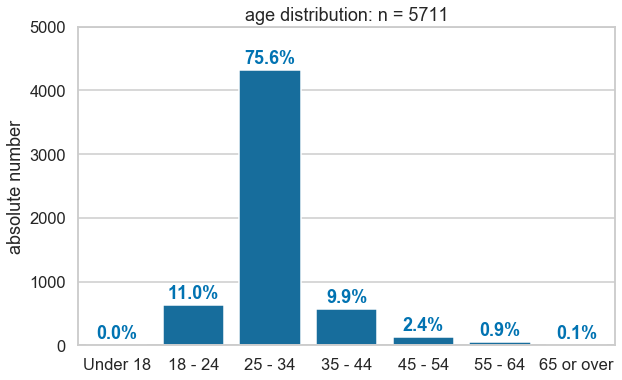

In [36]:
# a. age distribution

# get labels, value counts, and total counts
age_labels = df_clean['age'].value_counts().index
age_values = df_clean['age'].value_counts().values
age_total = df_clean['age'].value_counts().sum()

# sort labels and values by age category
age_labels = age_labels[[6, 1, 0, 2, 3, 4, 5]]
age_values = age_values[[6, 1, 0, 2, 3, 4, 5]]

# create barplot
fig = plt.figure(figsize=(9, 5.625))  # 16:10 aspect
sns.barplot(x=age_labels, y=age_values, color='b')
plt.ylim(0.0, 5000.0)
plt.ylabel('absolute number')
plt.title('age distribution: n = %s' % age_total)
# add percentages to each bar
for i in range(age_values.size):
    plt.text(i, age_values[i]+100, '{:.1f}%'.format(age_values[i]/age_total*100.0),
             ha='center', color='b', fontweight='bold')
# save plot
fig.tight_layout()
fig.savefig('plots/age_distribution.png', dpi=150.0)

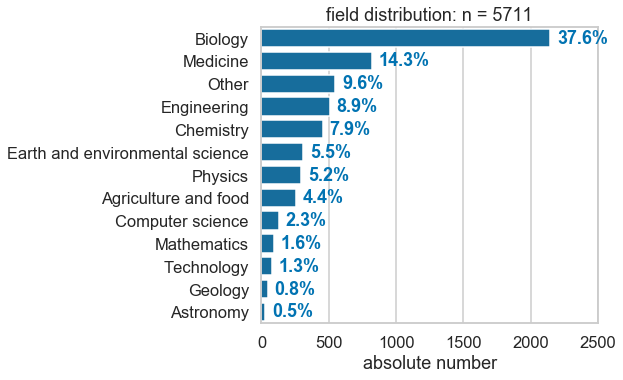

In [37]:
# b. field distribution

# get labels, value counts, and total counts
study_labels = df_clean['field'].value_counts().index
study_values = df_clean['field'].value_counts().values
study_total = df_clean['field'].value_counts().sum()

# shorten 'Astronomy' label
study_labels.values[12] = 'Astronomy'

# create barplot
fig = plt.figure(figsize=(9, 5.625))  # 16:10 aspect
sns.barplot(x=study_values, y=study_labels, color='b')
plt.xlim(0.0, 2500.0)
plt.xlabel('absolute number')
plt.title('field distribution: n = %s' % study_total)
# add percentages to each bar
for i in range(study_values.size):
    plt.text(study_values[i]+50, i, '{:.1f}%'.format(study_values[i]/study_total*100.0),
             va='center', color='b', fontweight='bold')
# save plot
fig.tight_layout()
fig.savefig('plots/field_distribution.png', dpi=150.0)

In [38]:
# find fields that are represented by more than 5% for later analysis
field_threshold = study_values/study_total >= 0.05
field_cols = list(study_labels[field_threshold])
field_cols

['Biology',
 'Medicine',
 'Other',
 'Engineering',
 'Chemistry',
 'Earth and environmental science',
 'Physics']

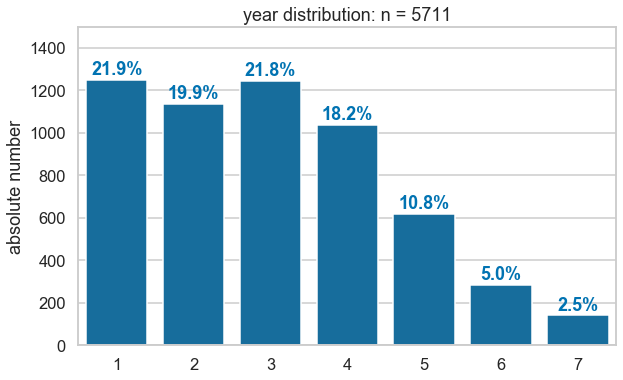

In [39]:
# c. year distribution

# get labels, value counts, and total counts
year_labels = df_clean['year'].value_counts().index
year_values = df_clean['year'].value_counts().values
year_total = df_clean['year'].value_counts().sum()

# create barplot
fig= plt.figure(figsize=(9, 5.625))  # 16:10 aspect
sns.barplot(x=year_labels, y=year_values, color='b')
plt.ylim(0.0, 1500.0)
plt.ylabel('absolute number')
plt.title('year distribution: n = %s' % study_total)

# sort values by year category for adding annotations
year_values = year_values[[0, 2, 1, 3, 4, 5, 6]]

# add percentages to each bar
for i in range(year_values.size):
    plt.text(i, year_values[i]+25, '{:.1f}%'.format(year_values[i]/year_total*100.0),
             ha='center', color='b', fontweight='bold')
# save plot
fig.tight_layout()
fig.savefig('plots/year_distribution.png', dpi=150.0)

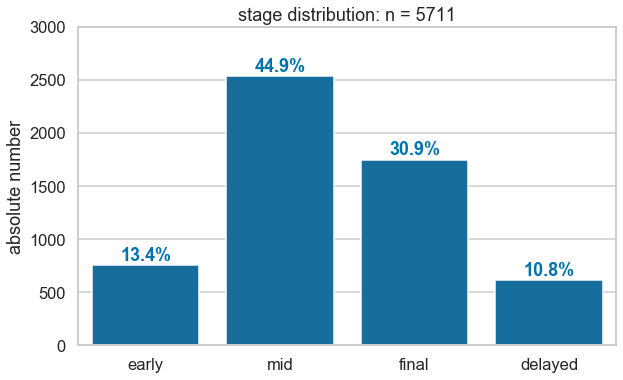

In [40]:
# d. stage in PhD program

# get labels, value counts, and total counts
stage_labels = df_clean['stage'].value_counts().index
stage_values = df_clean['stage'].value_counts().values
stage_total = df_clean['stage'].value_counts().sum()

# sort labels and values by increasing stage category
stage_labels = stage_labels[[2, 0, 1, 3]]
stage_values = stage_values[[2, 0, 1, 3]]

# create barplot
fig = plt.figure(figsize=(9, 5.625))  # 16:10 aspect
sns.barplot(x=stage_labels, y=stage_values, color='b')
plt.ylim(0.0, 3000.0)
plt.ylabel('absolute number')
plt.title('stage distribution: n = %s' % age_total)
# add percentages to each bar
for i in range(stage_values.size):
    plt.text(i, stage_values[i]+50, '{:.1f}%'.format(stage_values[i]/stage_total*100.0),
             ha='center', color='b', fontweight='bold')

# save plot
fig.tight_layout()
fig.savefig('plots/stage_distribution.png', dpi=150.0)

#### Observations on the feature distributions in the whole dataset
* **age**
    * more than 75% of the PhD students are between 25 and 34 years old
    * around 10% are in the 18–24 year range and in the 35–44 year range
* **field**
    * more than 50% of the PhD students study in the fields biolgoy and medicine
    * the high fraction of biology and medicine graduate students is probably due to the relevance of Nature in these fields
* **year**
    * the fraction in the first four years is almost uniform (~20% each); this corresponds with four-year long PhD programs in most countries
* **stage**
    * around 30% of the PhD students is in the last stage of their PhD program (more than 75% of average graduation time already passed)
    * 44% are in the mid stage (25% to 75% of average graduation time already passed)
    * 13% and 12% are in an early stage (less than 25% of graduation time passed) or in a delayed stage (more than average graduation time already passed), respectively

### 3.2 What is the motivation to pursue a PhD?
To obtain insights into the motivation of students to pursue a PhD, the frequency of the motivation feature is analyzed. If multiple answers were given, the answer given as most-relevant was selected. Further, differences in motivation of different fields of study are explored.

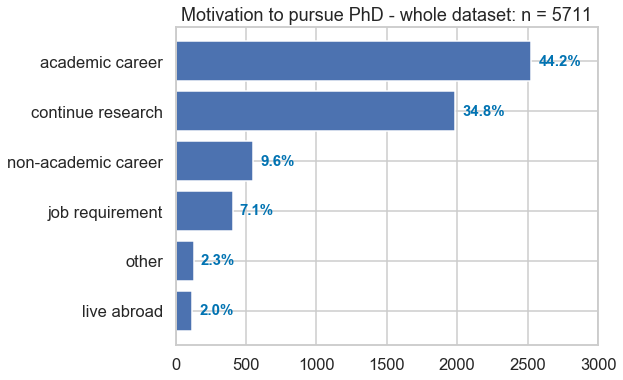

In [41]:
# get motivation value counts and labels for the whole dataset
motivation_overall_counts = df_clean['motivation'].value_counts().values
motivation_labels = df_clean['motivation'].value_counts().index.to_list()

# calculate total count
motivation_overall_total = motivation_overall_counts.sum()

# calculate fractions
motivation_overall_fraction = motivation_overall_counts/motivation_overall_total

# create barplot
fig = plt.figure(figsize=(9, 5.625))  # 16:10 aspect ratio
ax = plt.gca()
plt.barh(range(motivation_overall_fraction.size), motivation_overall_counts[::-1], align='center')
plt.xlim(0.0, 3000.0)
ax.set_yticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
ax.set_yticklabels(motivation_labels[::-1])
motivation_labels
plt.title('Motivation to pursue PhD - whole dataset: n = %i' % motivation_overall_total)
# add percentage values
for i in range(motivation_overall_fraction.size):
    plt.text(motivation_overall_counts[::-1][i]+50.0, i, '{:.1f}%'.format(motivation_overall_fraction[::-1][i]*100.0),
             va='center', fontsize='small', color='b', fontweight='bold')

# save plot
fig.tight_layout()
fig.savefig('plots/motivation.png', dpi=150.0)

In [42]:
# find motivation that are represented by more than 5% for later analysis
motivation_threshold = motivation_overall_fraction >= 0.05
motivation_cols = [motivation_labels[int(i)] for i in np.argwhere(motivation_threshold==True)]
motivation_cols

['academic career',
 'continue research',
 'non-academic career',
 'job requirement']

#### Are there difference in the motivation to pursue a PhD between different fields?

In [43]:
# create dataframe with absolute motivation counts per field
df_motivation_field = df_clean.groupby('field')['motivation'].value_counts().unstack(1)

# calculate total counts for each motivation answer per field
total_counts_motivation_field = df_motivation_field.sum(axis=1).values

In [44]:
# set values in dataframe to deviation per field from overall fraction in the whole dataset
df_motivation_field[:] = df_motivation_field.values/total_counts_motivation_field[:, np.newaxis] - \
                         motivation_overall_fraction[np.newaxis, :]

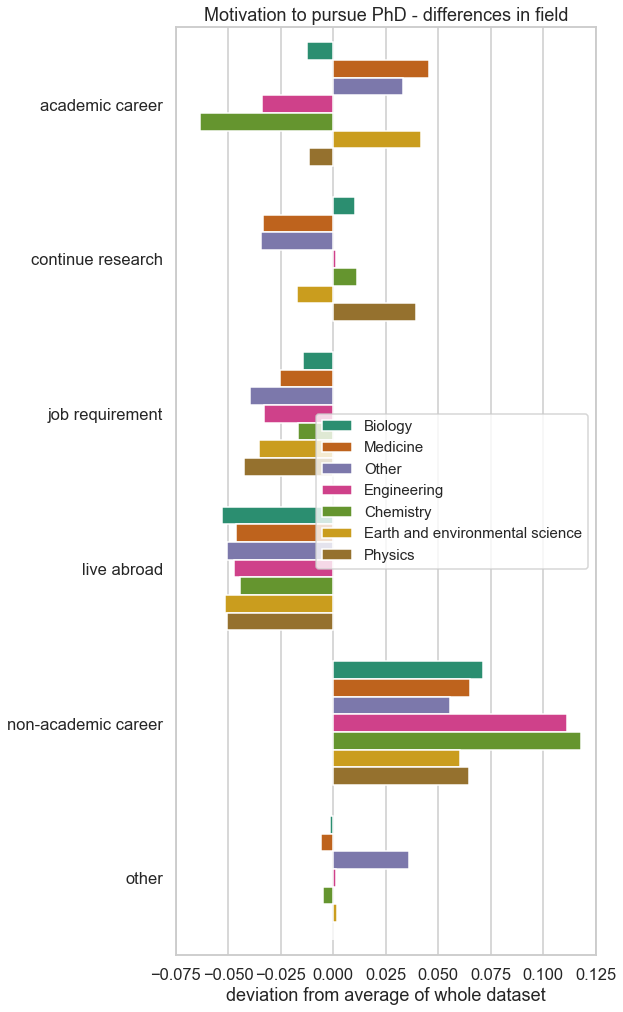

In [45]:
# create barplot showing the deviation from the motivation fraction in the whole dataset
fig = plt.figure(figsize=(9, 14.4))
ax = plt.gca()

# limit to fields that are represented by more than 5% in the whole dataset
sns.barplot(data=df_motivation_field.loc[field_cols].reset_index().melt(id_vars=['field']),
            y='motivation', x='value', hue='field', palette='Dark2')
plt.xlim(-0.075, 0.125)
plt.title('Motivation to pursue PhD - differences in field')
plt.ylabel('')
plt.xlabel('deviation from average of whole dataset')
plt.legend(loc=5, fontsize='small')

# save plot
fig.tight_layout()
fig.savefig('plots/motivation_field.png', dpi=150.0)

#### Observations
* for 44% an academic career is the main motivation to pursue a PhD degree
* around 35% want to continue to work in research and therefore choose to pursue a PhD
* for PhD students in chemistry and engineering a non-acacemic career is a higher motivation (+10%) to pursue a PhD degree instead of an academic career
* PhD students in medicine and earth and environmental science mention an academic career more often as motivation to pursue a PhD

### 3.3 What skills do PhD students learn?

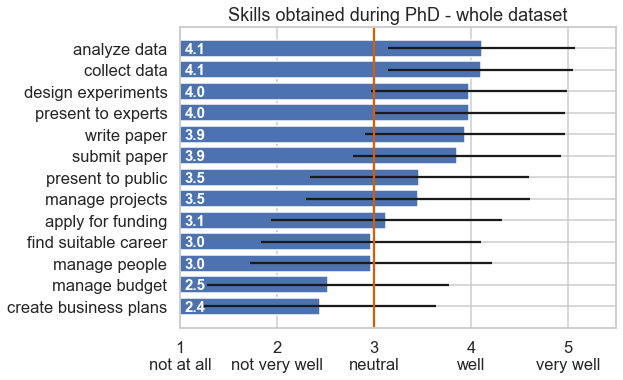

In [46]:
# list with columns related to skills
skill_cols = ['skill_data_collection', 'skill_data_analysis', 'skill_design_exp',
              'skill_writing_paper', 'skill_submitting_paper', 'skill_presenting_expert',
              'skill_presenting_public', 'skill_apply_funding', 'skill_finding_career',
              'skill_manage_project', 'skill_business_plans', 'skill_manage_people',
              'skill_manage_budget']

# create list with labels to be used in plots
skill_labels = ['collect data', 'analyze data', 'design experiments',
                'write paper', 'submit paper', 'present to experts',
                'present to public', 'apply for funding', 'find suitable career',
                'manage projects', 'create business plans', 'manage people',
                'manage budget']

# calculate mean and standard deviation of score for each scale (5-point scale from 1 (lowest) to 5 (highest))
# unknown answers were encoded as NaN and do not influence the calculation of mean and standard deviation
df_skill_overall = df_clean[skill_cols].agg(['mean', 'std'])

# get values and colum names
skill_overall_mean = df_skill_overall.loc['mean'].values 
skill_overall_std = df_skill_overall.loc['std'].values
skill_index = df_skill_overall.columns

# sort skills in descending order by mean
idx = np.argsort(skill_overall_mean)

# create barplot
fig = plt.figure(figsize=(9, 5.625))
ax = plt.gca()
# include xerr argument to indicate standard deviation
plt.barh(range(skill_overall_mean.size), skill_overall_mean[idx], xerr=skill_overall_std[idx],
         align='center')
plt.xlim(1.0, 5.5)
plt.ylim(-1.0, 13.0)
plt.vlines(3, -1.0, 13.0, colors='r', linestyles='-')
ax.set_yticks(range(skill_overall_mean.size))
ax.set_yticklabels(np.array(skill_labels)[idx])
ax.set_xticks([1.0, 2.0, 3.0, 4.0, 5.0])
ax.set_xticklabels(['1\nnot at all', '2\nnot very well', '3\nneutral', '4\nwell', '5\nvery well'])
plt.title('Skills obtained during PhD - whole dataset')
# add mean values at beginning of column
for i in range(skill_overall_mean.size):
    plt.text(1.05, i-0.05, '{:.1f}'.format(skill_overall_mean[idx][i]),
             va='center', fontsize='small', color='w', fontweight='bold')
# save plot
fig.tight_layout()
fig.savefig('plots/skills.png', dpi=150.0)

In [47]:
# show number of unknown (NaN) values for each skill-column
df_clean[skill_cols].isna().sum(axis=0)/df_clean.shape[0]

skill_data_collection      0.025740
skill_data_analysis        0.019961
skill_design_exp           0.043950
skill_writing_paper        0.031518
skill_submitting_paper     0.041324
skill_presenting_expert    0.027491
skill_presenting_public    0.044300
skill_apply_funding        0.059009
skill_finding_career       0.064437
skill_manage_project       0.045351
skill_business_plans       0.116967
skill_manage_people        0.073892
skill_manage_budget        0.118018
dtype: float64

#### Observations
* PhD students learn well to design experiments, collect and analyze data, and document and present data in scientific presentations or papers
* managing people and projects or presenting to a non-expert audience are neither well nor not well taught in graduate schools
* managing budgets or creating business plans are not obtained during a PhD
* at most 11% of NaN values for 'creating business plans' and 'manage budget'
* all other skills contain less NaN values

#### Do PhD students in different stages evaluate the skills they obtained differently?

In [48]:
# create dataframe with skills score grouped by 'stage'
df_skill_difference_stage = df_clean.groupby('stage')[skill_cols].mean()

In [49]:
# set values in dataframe to deviation from mean of whole dataset
# normalized by the standard deviation in whole dataset
df_skill_difference_stage[:] = (df_clean.groupby('stage')[skill_cols].mean().values - skill_overall_mean)/ \
                               skill_overall_std

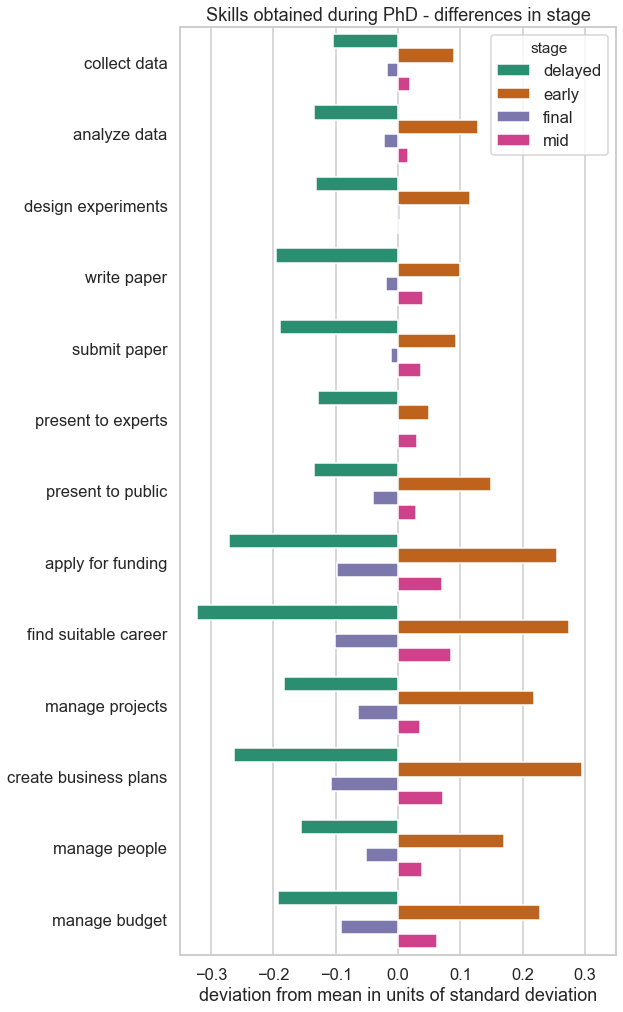

In [50]:
# create barplot showing the difference in skills between stages
fig = plt.figure(figsize=(9, 14.4))
ax = plt.gca()
sns.barplot(data=df_skill_difference_stage.reset_index().melt(id_vars=['stage']),
            y='variable', x='value', hue='stage', palette='Dark2')
plt.xlim(-0.35, 0.35)
ax.set_yticklabels(skill_labels)
plt.title('Skills obtained during PhD - differences in stage')
plt.ylabel('')
plt.xlabel('deviation from mean in units of standard deviation')
# save plot
fig.tight_layout()
fig.savefig('plots/skills_stage.png', dpi=150.0)

#### Observations
* students in the final or delayed stage consistently evaluate the skill they learned during their PhD lower than the mean of the whole dataset
* in contrast, students in an early and mid stage evaluate the skills higher than the mean of the whole dataset
* in general, the deviations are at most 0.3 times the standard deviation observed in the whole dataset; the deviations are thus not significant

#### Do PhD students in different fields evaluate the skills they obtained differently?

In [51]:
# create dataframe with skill scores groupd by 'field'
df_skill_difference_field = df_clean.groupby('field')[skill_cols].mean()

In [52]:
# set values in dataframe to deviation from mean of the whole dataset
# normalized by the standard deviation of the whole dataset
df_skill_difference_field[:] = (df_clean.groupby('field')[skill_cols].mean().values-skill_overall_mean)/ \
                               skill_overall_std

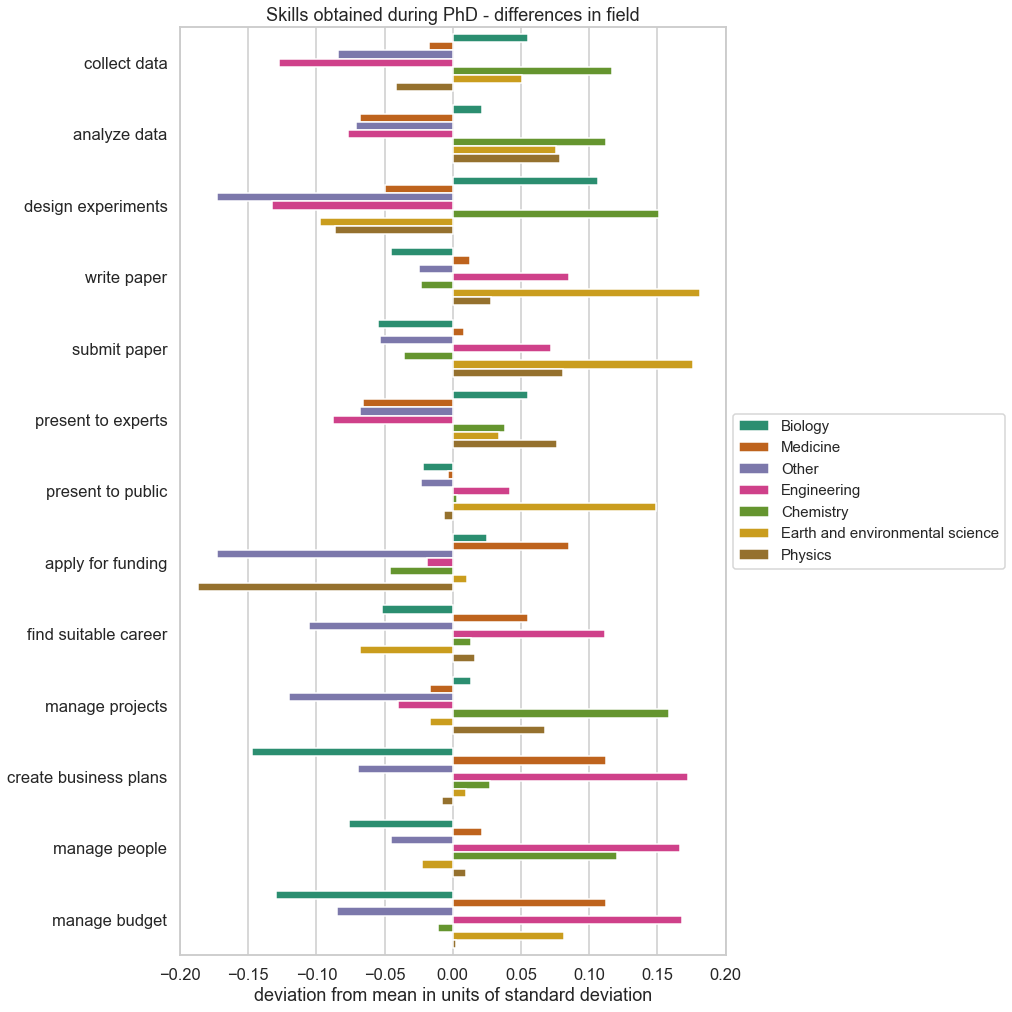

In [53]:
# create barplot
fig = plt.figure(figsize=(14.4, 14.4))
ax = plt.gca()
sns.barplot(data=df_skill_difference_field.loc[field_cols].reset_index().melt(id_vars=['field']),
            y='variable', x='value', hue='field', palette='Dark2')
plt.xlim(-0.2, 0.2)
ax.set_yticklabels(skill_labels)
plt.title('Skills obtained during PhD - differences in field')
plt.ylabel('')
plt.xlabel('deviation from mean in units of standard deviation')
plt.legend(loc='center left', fontsize='small', bbox_to_anchor=(1.0, 0.5))
# save plot
fig.tight_layout()
fig.savefig('plots/skills_field.png', dpi=150.0)

#### Observation
* engineering Phd students feel more prepared in managing budgets and people, and in creating business plans compared to all PhD students in the dataset
* biology students feel consistently less well prepared in the same tasks
* chemistry students feel better prepared in designing experiments and collecting and analyzing data
* PhD students in earth and environmental science feel particularly well prepared communication their scientific findings in articles or talks (also to public)
* in general, the deviation are at most 20% of the standard deviation in the whole dataset

### 3.3 Satisfaction with PhD

In [54]:
# get mean and standard deviation of satisfaction of the whole dataset
satisfaction_overall_mean = df_clean['satisfaction_PhD'].mean()
satisfaction_overall_std = df_clean['satisfaction_PhD'].std()

# print satisfaction mean and std value
print(u'satisfaction mean = {:.1f} ± {:.1f}'.format(satisfaction_overall_mean, satisfaction_overall_std))

satisfaction mean = 7.0 ± 1.9


##### Observations
* in general, PhD students rate their satisfaction with their PhD program on average with a 7 on a 10-point scale
* most PhD students are thus quite happy with their PhD program

#### Are there differences in the satisfaction of PhD students depending on their motivation and stage?

In [55]:
# create dataframe with mean satisfaction grouped by field, stage, and motivation
df_satisfaction = df_clean.groupby(['field', 'stage', 'motivation'])['satisfaction_PhD'].mean().unstack(1).reset_index().melt(id_vars=['field', 'motivation'])

# set values in satisfaction dataframe to deviation from mean of the whole dataset in units of the standard deviation
df_satisfaction.loc[:, 'value'] = (df_satisfaction.loc[:, 'value'] - satisfaction_overall_mean)/satisfaction_overall_std

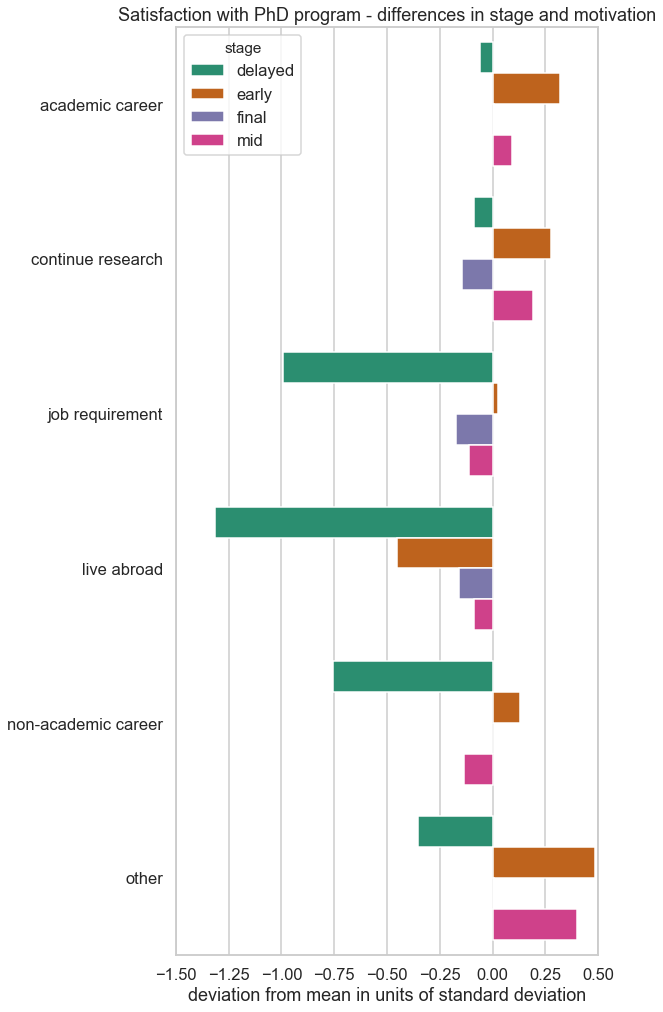

In [56]:
# create bar plot showing deviations in satisfaction depending on motivation and stage
fig = plt.figure(figsize=(9, 14.4))
ax = plt.gca()
sns.barplot(data=df_satisfaction, ci=None,
            y='motivation', x='value', hue='stage', palette='Dark2')
plt.xlim(-1.5, 0.5)
plt.title('Satisfaction with PhD program - differences in stage and motivation')
plt.ylabel('')
plt.xlabel('deviation from mean in units of standard deviation')
# save plot
fig.tight_layout()
fig.savefig('plots/satisfaction_motivation_stage.png', dpi=150.0)

Text(0, 0.5, 'satisfaction')

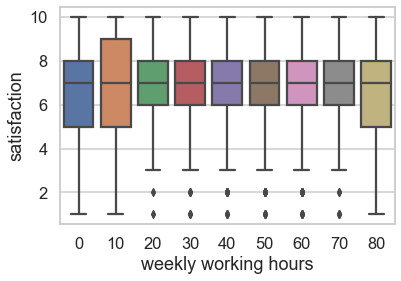

In [57]:
# check if satisfaction correlates with working hours
sns.boxplot(data=df_clean, y='satisfaction_PhD', x='working_hours')
plt.xlabel('weekly working hours')
plt.ylabel('satisfaction')

#### Observations
* students who take longer than the average duration of their PhD program (delayed PhD students) are particularly less satisfied with their PhD if their motivation was to obtain a PhD as a job requirement, e.g., for a non-academic carrer, or if they wanted to live abroad
* students who saw a PhD as a way to live abroad are consistently less satisfied with their PhD program, regardless of their stage within the PhD program
* satisfaction also does not correlate with weekly working hours betwen 20 and 70 hours per week; the distribution is a little more spread for less than 10 and more than 80 working hours per week, however, the mean does not significantly change

In [58]:
# print most relevant concerns
df_clean['concern'].value_counts()/df_clean.shape[0]

career path            0.240939
no faculty position    0.177727
work-life balance      0.139555
get funding            0.136929
financial              0.125372
PhD value              0.053406
mental health          0.050079
impostor               0.039223
political              0.022238
other                  0.014533
Name: concern, dtype: float64

In [59]:
# print most relevant joys
df_clean['joy'].value_counts()/df_clean.shape[0]

intellectual                0.492033
bright people               0.182280
creativity                  0.121520
university                  0.102784
chance academic post        0.030643
use skills                  0.019611
chance non-academic post    0.018561
delay pro-life              0.012607
other                       0.010156
social life                 0.009806
Name: joy, dtype: float64

In [60]:
change_cols = ['change_adviser', 'change_field', 'change_noPhD', 'change_nothing', 'change_other']
df_clean[change_cols].sum(axis=0)/df_clean.shape[0]

change_adviser    0.224129
change_field      0.198214
change_noPhD      0.056908
change_nothing    0.479075
change_other      0.112765
dtype: float64

#### Observations
* for around 70% of PhD students, the intellectual challenge and working together with bright people is the best part during their PhD
* around 10% either like the creativity in their PhD or to be part of the university community
* for 24% and 18% uncertain career paths and the lack of facutly positions at universities after the PhD are of highest concern
* only 5% have concerns about the value of their PhD degree in the future
* almost 50% of the PhD students would not change anything during their PhD, while 22% would change their adviser and 19% would change the field

## 4. Can the satisfaction of PhD students be predicted before they start?
Predicting the satisfaction of PhD students from features that are available before they start with their PhD would be helpful for students and grad schools alike to make informed decisions on their career path and candidates, respectively.

The features that are available before the start of the PhD program are `motivation` and `field`. Analysis of the distribution of the satisfaction score will give a first overview if the satisfaction can be modelled.

In [61]:
# create filter to only select fields and motivations that represent more than 5% of the total dataset
filter_1 = df_clean['field'].isin(field_cols)
filter_2 = df_clean['motivation'].isin(motivation_cols)

In [62]:
df_clean['degree'].value_counts()

M        3854
B        1174
PhD       301
Pro       271
Other     111
Name: degree, dtype: int64

<Figure size 432x288 with 0 Axes>

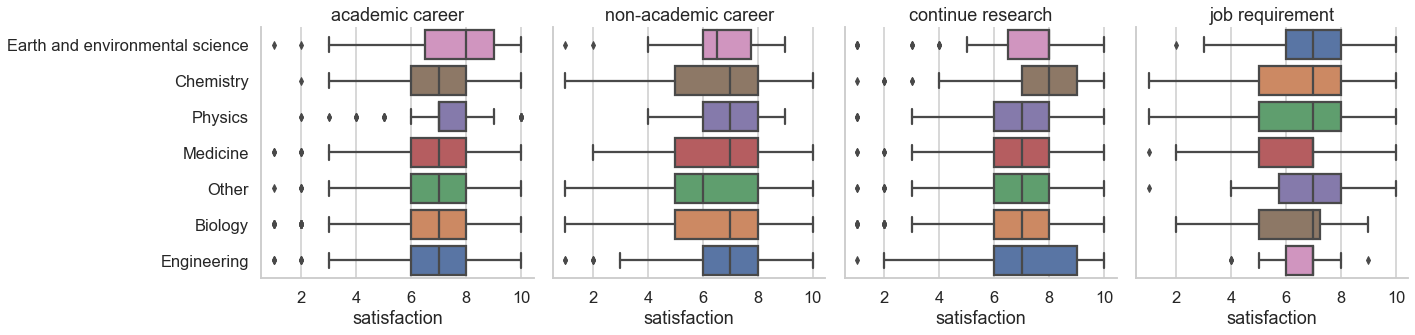

In [63]:
# create boxplot of satisfaction for the field and motivation categories
# to see if there are difference in the distributions
fig = plt.figure()
g = sns.catplot(data=df_clean[filter_1 & filter_2], x='satisfaction_PhD', y='field', col='motivation', kind='box')
g.set_axis_labels("satisfaction", "")
g.set_titles("{col_name}")
# save plot
plt.tight_layout()
plt.savefig('plots/satisfaction_distributions.png', dpi=150.0)

#### Observations
* for the principal features that are known priori, the distributions of the satisfaction are similar in mean, quartiles, and range
* the prediciton of the satisfaction from a priori features is thus not possible with the given data

## 5. Summary and Conclusions
**1. Why do students pursue a PhD?**
* most of the students who pursue a PhD want to work in academia (44%) or continue research (35%)
* students in science or engineering pursue a PhD for a non-academic career twice as often as the average PhD student

**2. What do students learn during their PhD?**
* after their PhD students will be experts in designing experiments, collecting and analyzing data, and communication their findings to experts through articles or presentations
* communication of findings to the public or managing projects are still obtained during the PhD, however, to a lower degree than for example collecting and analyzing data
* students do not learn to manage budgets or to create business plans
* slight variations exist in different fields

**3. Are PhD students satisfied with their PhD?**
* on average students are satisfied with their PhD (7 out of 10)
* only students who took longer than the average duration in their program are significantly less satisfied with their PhD if their motivation was to do the PhD as job requirement, e.g., for a non-academic career, or to live abroad

**4. Can the satisfaction of PhD students be predicted based on a priori features such as field and motivation?**
* analysis shows that the distributions of the satisfaction among different fields and motivations to pursue a PhD are similar
* thus, creating a model to predict the satisfaction of PhD students is not promising
* overall, a PhD is a highly individual experience and depends on many features that are not recorded in the available data (e.g. connection to superviser, colleagues, personal life, etc.)